# Assignment 2: Gender Income Gap


## Idea:

Males make more money than females.


## Null Hypothesis:

H0: Male median incomes are the same or lower than female median incomes.

## Alternative Hypothesis:

Ha: Male median incomes are higher than female median incomes.

### Set up working environment

In [1]:
from __future__ import print_function, division
import sys
import os
import numpy as np
import pylab as pl
import pandas as pd
import json
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Create two python dictionaries to store data

In [2]:
# create dataframes for each dictionary key, leading to specific data url
# set header to row 9 (fix formating errors)

#female data
fall = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_1.xls", header = 9)

fwhite = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_4.xls", header = 9)

fblack = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_6.xls", header = 9)

fasian = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_8.xls", header = 9)

fhispanic = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_9.xls", header = 9)

#male data
mall = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_1.xls", header = 9)

mwhite = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_4.xls", header = 9)

mblack = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_6.xls", header = 9)

masian = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_8.xls", header = 9)

mhispanic = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_9.xls", header = 9)


In [3]:
#create dictionaries and keys for each gender/ethnicity
allmales = {'all': mall, 'white': mwhite, 'black': mblack, 'asian': masian, 'hispanic': mhispanic}
allfemales = {'all': fall, 'white': fwhite, 'black': fblack, 'asian': fasian, 'hispanic': fhispanic}

#make sure previous command worked, check to see if type = dictionary
type(allfemales)


dict

### Initial data exploration

In [4]:
#check first few rows of data
allfemales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732,399,20942,1123,0.65,0.0162


In [5]:
#look at data columns
allfemales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [6]:
#basic sample statistics for each dataset
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())


##### hispanic
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         1908.739130            274.282609        137.717391   
std          3688.718088            568.547923        199.157298   
min             1.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14034.000000           2704.000000        783.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         154.043478        188.913043          175.173913   
std          259.111813        321.948569          341.577016   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN      

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean        17383.000000           2971.826087       1010.608696   
std         28945.070201           7604.959824       1190.210877   
min            84.000000              0.000000          6.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max        109956.000000          38367.000000       4298.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean        1148.869565       1470.391304         1469.478261   
std         1569.333455       2365.722680         2502.601125   
min            0.000000          2.000000            0.000000   
25%                 NaN               NaN                 NaN 

### Explore Data Through Plotting

In [7]:
# First find non-real numbers and replace with 'Nan' to make all column values either numbers or 'Nan'
for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal = gender[k].applymap(np.isreal)
        for c in gender[k].columns:
            #if some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] = np.nan
                gender[k][c] = gender[k][c].astype(float)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


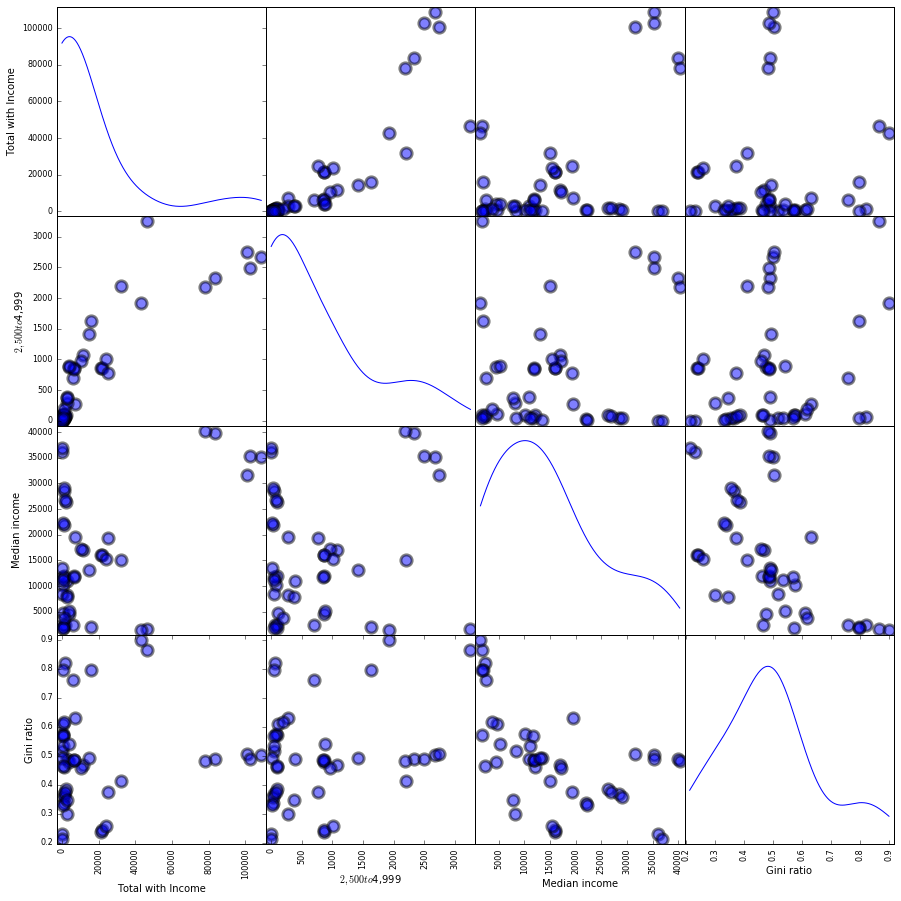

In [8]:
# Create plot matrix of all male ethnicities (each of 4 column names plotted against each other)
# Plots include analyses of Total with Income, Income Range $2,500 to $4,999, Median Income, and Gini Ratio
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')  

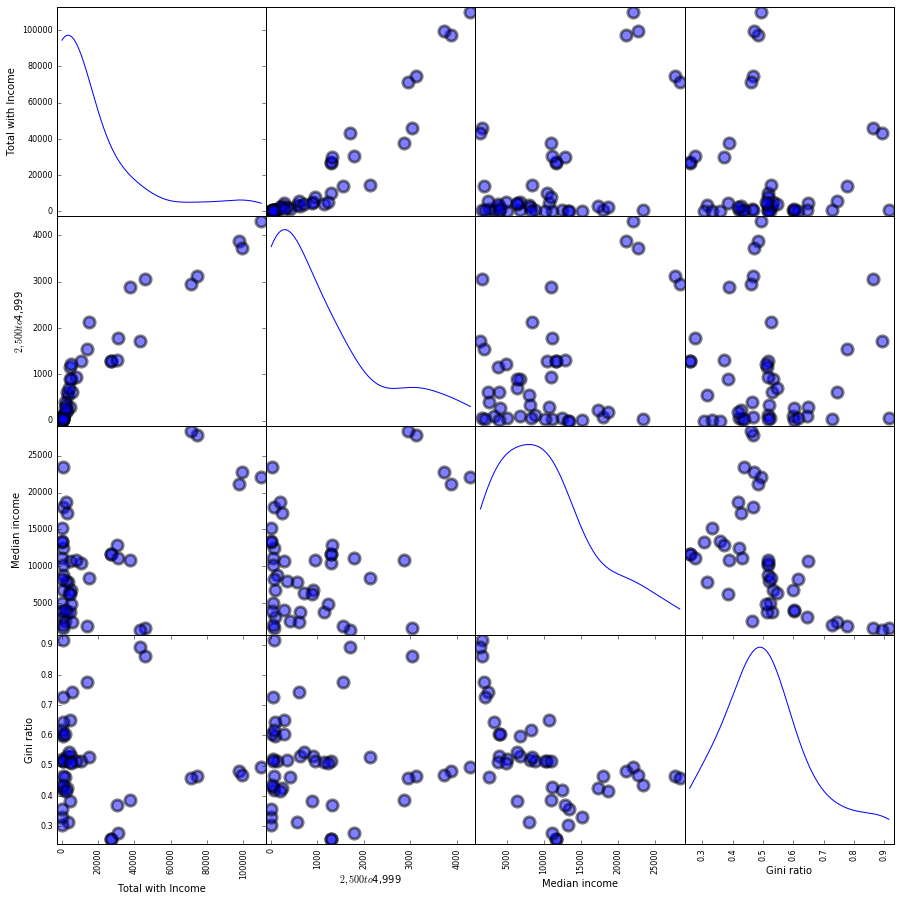

In [9]:
# Create plot matrix of all female ethnicities (each of 4 column names plotted against each other)
# Plots include analyses of Total with Income, Income Range $2,500 to $4,999, Median Income, and Gini Ratio
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')  

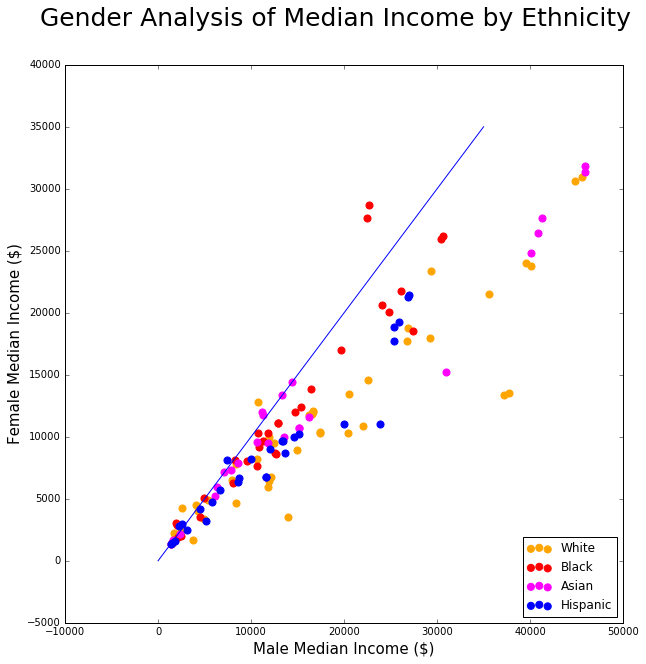

In [32]:
# Create scatterplot of each ethnicity's median income, with male and female data plotted against each other
# Include line with slope 1 for comparison

# create variable for point size
sizes = 50

# set figure size
fig = pl.figure(figsize = (10,10))

# create scatterplots
pl.scatter(allmales['white']['Median income'], allfemales['white']['Median income'], color = 'orange', s=sizes, label='White')
pl.scatter(allmales['black']['Median income'], allfemales['black']['Median income'], color = 'red', s=sizes, label='Black')
pl.scatter(allmales['asian']['Median income'], allfemales['asian']['Median income'], color = 'magenta', s=sizes, label='Asian')
pl.scatter(allmales['hispanic']['Median income'], allfemales['hispanic']['Median income'], color = 'blue', s=sizes, label='Hispanic')

# set title
fig.suptitle('Gender Analysis of Median Income by Ethnicity', fontsize=25)

# set axis labels
pl.xlabel('Male Median Income ($)',fontsize = 15)
pl.ylabel('Female Median Income ($)', fontsize = 15)

# define legend
pylab.legend(loc='lower right')

# plot line with slope 1 for analysis
new_line = pl.plot([0,35000],[0,35000])

### Figure description:

The plot above reveals that male median incomes for all ethnicities are greater than female median incomes. The majority of the male median income data falls below the line, which justifies this analysis.

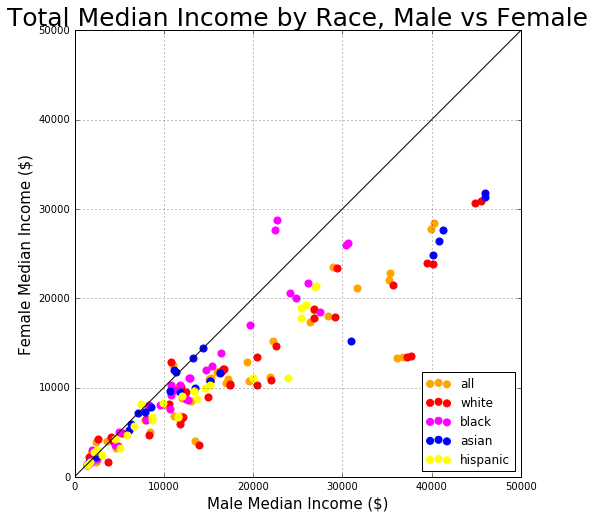

In [46]:
# first regression: total median income

def income_plot(colors):
    keys = ['all', 'white', 'black', 'asian', 'hispanic']
    pl.figure(figsize = (8, 8))
    for i in range(len(keys)):
        x = allmales[keys[i]]['Median income']
        y = allfemales[keys[i]]['Median income']
        pl.scatter(x,y, s=sizes, color = colors[i], label = keys[i])
    pl.axis([0,50000,0,50000])
    pl.plot([0,50000],[0,50000],'k')
    pl.title('Total Median Income by Race, Male vs Female', fontsize = 25)
    pl.xlabel('Male Median Income ($)',fontsize = 15)
    pl.ylabel('Female Median Income ($)', fontsize = 15)
    pl.grid()
colors = ['orange', 'red', 'magenta', 'blue', 'yellow']
income_plot(colors)
pl.legend(loc = 'lower right')

### 2nd Regression:

In [35]:
# first create function to define data points for each dataset
def create_data(data_point):
    female = pd.Series([0])
    male = pd.Series([0])
    for i in allfemales:
        fseries = pd.Series(allfemales[i]['Median income'][data_point])
        female = female.append(fseries)
    for i in allmales:
        mseries = pd.Series(allmales[i]['Median income'][data_point])
        male = male.append(mseries)
    
    allgender = pd.DataFrame({"Female" : female,
                             "Male": male})
    allgender.index = range(len(allgender))
    return allgender, female, male
allgender_data1, female1, male1 = create_data(1)
allgender_data1


,Female,Male
0,0.0,0.0
1,17762.0,25411.0
2,22063.0,35228.0
3,20044.0,24855.0
4,23780.0,40122.0
5,24840.0,40153.0


In [47]:
# define function to plot the single data points just created
keys = ['all', 'white', 'black', 'asian', 'hispanic']
def plot_single(df):
    for i in range(1,6):
        pl.plot(df.Male[i],df.Female[i],'o',ms=15,c = colors[i-1], label = 'selected ' + keys[i-1])
    pl.legend(loc ='lower right')

In [48]:
# use OlS from statsmodels package for regression
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'Female ~ Male', data = allgender_data1).fit()
print(lm.params)
print(lm.rsquared)

Intercept    1674.692688
Male            0.593844
dtype: float64
0.951678545321


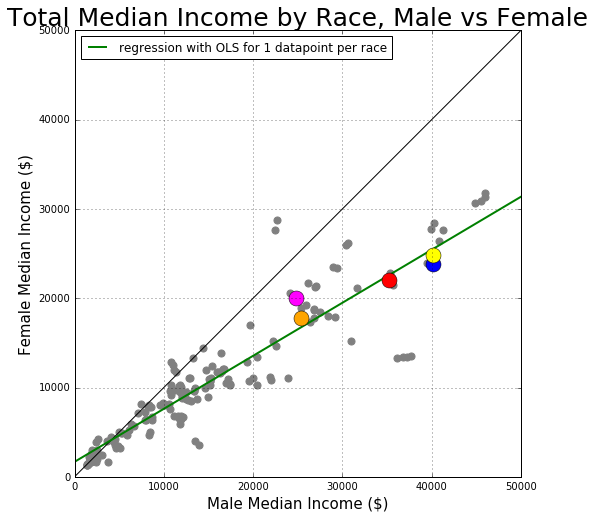

In [50]:
# regression plot for each race, one datapoint

X = np.arange(50000)

income_plot(colors=['gray']*5)
ols, = pl.plot(X,X*lm.params[1] +lm.params[0], 'g-', linewidth = 2)
plot_single(allgender_data1)
pl.legend([ols],['regression with OLS for 1 datapoint per race'], 
        loc = 'upper left')

### Predictions:

My ideal stipend would be an annual income of 100,000$. I am a female, therefore what would my salary be compared to a males using my model?



In [51]:
# use OLS to make prediction: total median regression
allgender, female, male = create_data(np.arange(50))
allgender = allgender.dropna()

lm1 = smf.ols(formula = 'Female ~ Male', data = allgender).fit()
print(lm1.params)
print(lm1.rsquared)


Intercept    1470.993894
Male            0.609942
dtype: float64
0.860609191064


In [52]:
# test model prediction
my_prediction = lm1.params[1]*100000 + lm1.params[0]
print('My expected salary according to statsmodels OLS is $' + str(my_prediction) )

My expected salary according to statsmodels OLS is $62465.1948826


According to this model, I would only make 62,465 dollars per year compared to a man in the same position who makes 100,000 dollars per year. This reveals the gender income bias and provides evidence to reject the null hypothesis.

### Analyzing Race Differences:

This data reveals both gender income differences and race income differences. A general conclusion I can make from the above plots is that black workers have a more equal pay difference between genders than other races. White males also make the most (higest median incomes) compared to other races as well as white females.